data   coverage in y/x: (0, 0, 360, 300)
subset coverage in y/x: (0, 0, 360, 300)
data   coverage in lat/lon: (131.1500975, 33.149906, 131.27009629999998, 33.049907000000005)
subset coverage in lat/lon: (131.1500975, 33.149906, 131.27009629999998, 33.049907000000005)
------------------------------------------------------------------------
colormap: jet
display in unit: 1
data    range: 0.0 - 0.0069166106445
display range: 0.0 - 0.0069166106445
display data in transparency: 1.0
plot in Lat/Lon coordinate
map projection: cyl
plotting Data ...
plot reference point


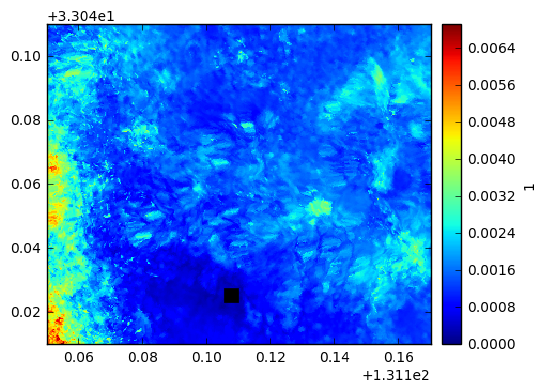

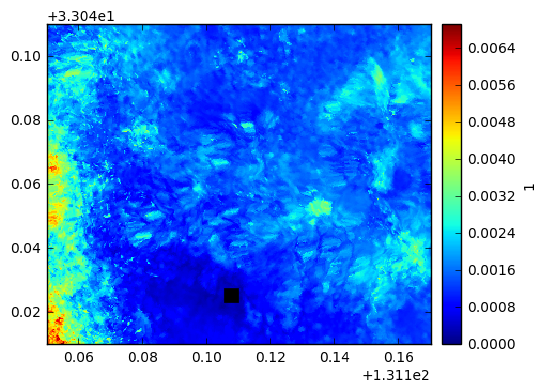

In [3]:
import matplotlib.pyplot as plt
import pysar._readfile as readfile
import pysar.view as view

File='/Users/jeromezhang/Documents/insarlab/Kyushu/Volcanoes/Kuju/AlosAT422/std_velocity_ex.h5'
data, atr = readfile.read(File)

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax, inps = view.plot_matrix(ax, data, atr)
plt.show()